In [7]:
from unrealcv import client
import os, sys, time

In [14]:
# connect to ue
client.connect()
if not client.isconnected():
    print('UnrealCV server is not running.')

INFO:__init__:234:Got connection confirm: b'connected to warehouse_simple'


=>Info: using ip-port socket


In [15]:
# check config
res = client.request('vget /unrealcv/status')
# The image resolution and port is configured in the config file.
print(res)

Is Listening
Client Connected
9000
Configuration
Config file: /Users/Shared/Epic Games/UE_4.27/Engine/Binaries/Mac/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



In [16]:
# import stuff
import numpy as np
from matplotlib import pyplot as plt

In [190]:
# save images
res = client.request('vget /camera/1/lit /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit.png')
print(res)
res = client.request('vget /camera/1/object_mask /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object.png')
print(res)
res = client.request('vget /camera/1/normal /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal.png')
print(res)

/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal.png


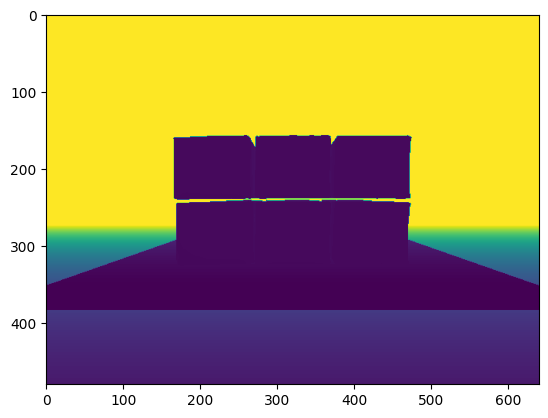

In [189]:
# get depth image
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth.npy')
img_array = np.load('depth.npy')
plt.imshow(img_array)
plt.show()

In [167]:
# get camera location
res = client.request(f'vget /camera/1/location')
print(res)
res = client.request(f'vget /camera/1/rotation')
print(res)

175.000 0.000 124.009
0.000 180.000 0.000


ok


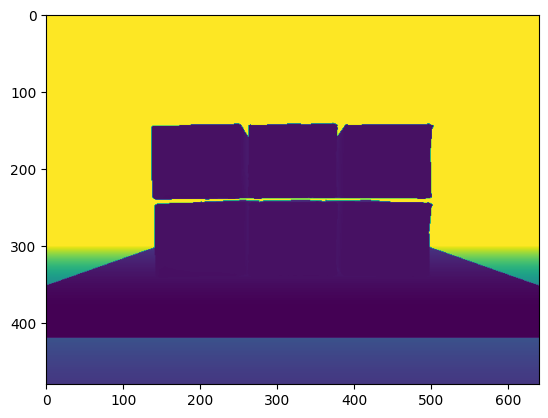

/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_front.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_front.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_front.png
ok


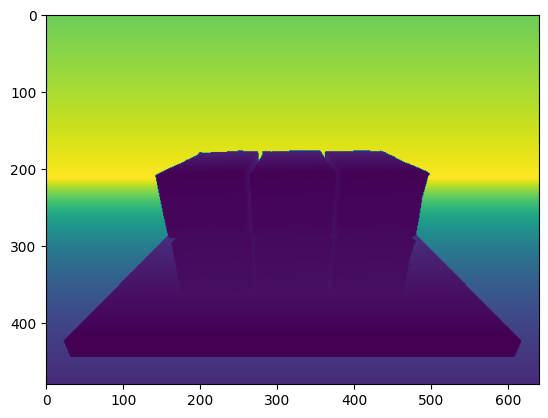

/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_top.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_top.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_top.png
ok


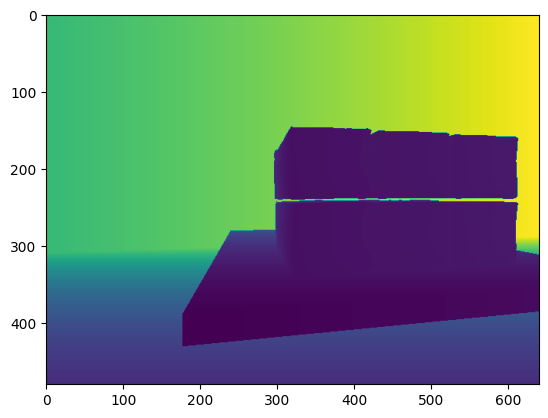

/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_left.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_left.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_left.png
ok


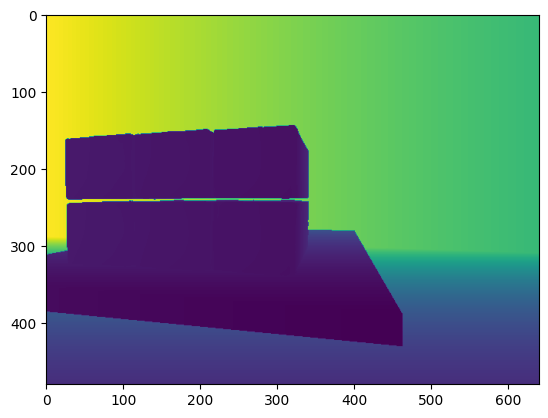

/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_right.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_right.png
/Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_right.png


In [217]:
# front
res = client.request(f'vset /camera/1/location 110 80 100')
res = client.request(f'vset /camera/1/rotation 0 180 0')
print(res)
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth_front.npy')
img_array = np.load('depth_front.npy')
plt.imshow(img_array)
plt.show()
# save images
res = client.request('vget /camera/1/lit /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_front.png')
print(res)
res = client.request('vget /camera/1/object_mask /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_front.png')
print(res)
res = client.request('vget /camera/1/normal /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_front.png')
print(res)

# top
res = client.request(f'vset /camera/1/location 110 80 130')
res = client.request(f'vset /camera/1/rotation -20 180 0')
print(res)
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth_top.npy')
img_array = np.load('depth_top.npy')
plt.imshow(img_array)
plt.show()
# save images
res = client.request('vget /camera/1/lit /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_top.png')
print(res)
res = client.request('vget /camera/1/object_mask /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_top.png')
print(res)
res = client.request('vget /camera/1/normal /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_top.png')
print(res)

# left
res = client.request(f'vset /camera/1/location 110 120 100')
res = client.request(f'vset /camera/1/rotation 0 190 0')
print(res)
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth_left.npy')
img_array = np.load('depth_left.npy')
plt.imshow(img_array)
plt.show()
# save images
res = client.request('vget /camera/1/lit /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_left.png')
print(res)
res = client.request('vget /camera/1/object_mask /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_left.png')
print(res)
res = client.request('vget /camera/1/normal /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_left.png')
print(res)

# right
res = client.request(f'vset /camera/1/location 110 40 100')
res = client.request(f'vset /camera/1/rotation 0 170 0')
print(res)
res = client.request('vget /camera/1/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth_right.npy')
img_array = np.load('depth_right.npy')
plt.imshow(img_array)
plt.show()
# save images
res = client.request('vget /camera/1/lit /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/lit_right.png')
print(res)
res = client.request('vget /camera/1/object_mask /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/object_right.png')
print(res)
res = client.request('vget /camera/1/normal /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/normal_right.png')
print(res)

In [59]:
res = client.request('vget /objects')
print(res)

InstancedFoliageActor_0 Floor_14 Table Chair Chair_15 Statue Brush_1 CameraActor_0 GameplayDebuggerCategoryReplicator_0 GameplayDebuggerPlayerManager_0 HUD_0 Starter_Background_Cue_2 ParticleEventManager_0 PlayerCameraManager_0 UnrealcvWorldController_0 BP_Sky_Sphere_C_2 Cube GameModeBase_0 GameStateBase_0 SkyLight_1 GameNetworkManager_0 GameSession_0 PlayerState_0 WorldSettings_1 PlayerController_0 AbstractNavData-Default DefaultPawn_0 Minimal_Default_C_0 SphereReflectionCapture10 SphereReflectionCapture_1 LightSource PlayerStart FusionCameraActor_2 GlobalPostProcessVolume DefaultPhysicsVolume_0 


In [180]:
res = client.request(f'vget /cameras')
print(res)

PawnSensor FusionCameraSensor 


In [113]:
res = client.request(f'vget /object/Cube/location')
print(res)
res = client.request(f'vget /object/Cube/rotation')
print(res)
res = client.request(f'vget /object/Cube/scale')
print(res)

0.000 0.000 0.000
0.000 0.000 0.000
1.000 20.000 30.000


In [114]:
res = client.request(f'vset /object/Cube/location -500 0 0')
print(res)
res = client.request(f'vset /object/Cube/scale 1 20 30')
print(res)

ok
ok


ok


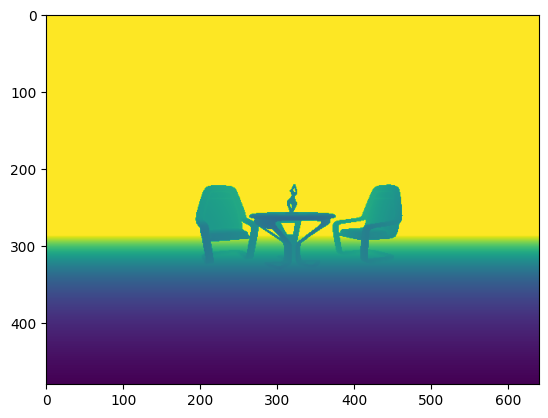

In [136]:
res = client.request(f'vset /camera/0/location 150 0 200')
res = client.request(f'vset /camera/0/rotation 0 -180 0')
print(res)
res = client.request('vget /camera/0/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth.npy')
img_array = np.load('depth.npy')
plt.imshow(img_array)
plt.show()

In [135]:
res = client.request(f'vget /object/Table/location')
print(res)
res = client.request(f'vget /object/Table/rotation')
print(res)
res = client.request(f'vget /object/Table/scale')
print(res)

-180.000 0.000 32.000
0.000 -130.000 0.000
1.000 1.000 1.000


In [152]:
res = client.request(f'vset /object/Table/location 0 0 32')
print(res)

ok


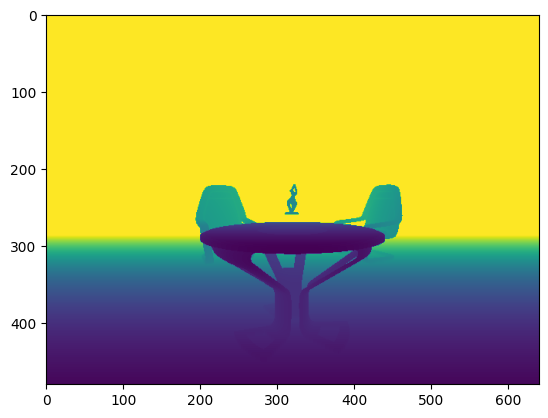

In [153]:
res = client.request('vget /camera/0/depth /Users/hiro/warehouse_drone/simulation/ue4_dataset_generation/depth.npy')
img_array = np.load('depth.npy')
plt.imshow(img_array)
plt.show()